# Introduction to Keras and TensorFlow

## Constant tensors and variables

### All 0 or 1 Tensor
All 0 tensor = tf.zeros((shape))
<br> All 1 tensor = tf.ones((shape))

In [ ]:
import tensorflow as tf
x = tf.ones((2,1)) # tf.ones(shape = (2,1))
print(x)

tf.Tensor(
[[1.]
 [1.]], shape=(2, 1), dtype=float32)


In [ ]:
x = tf.zeros((2,1))
print(x)

tf.Tensor(
[[0.]
 [0.]], shape=(2, 1), dtype=float32)


### Random Tensor
Normal random tensor: tf.random.normal
<br> Uniform random tensor: tf.random.uniform

In [ ]:
x = tf.random.normal(shape = (3,1), mean = 0, stddev = 1.)
x

<tf.Tensor: shape=(3, 1), dtype=float32, numpy=
array([[0.66491324],
       [0.24425429],
       [0.59384936]], dtype=float32)>

In [ ]:
x = tf.random.uniform(shape = (3,1), minval = 0, maxval = 5)
x

<tf.Tensor: shape=(3, 1), dtype=float32, numpy=
array([[2.379371 ],
       [2.171247 ],
       [1.2099183]], dtype=float32)>

### Numpy arrays are assignable

In [ ]:
import numpy as np
x = np.ones((2,2))
print(x)
x[0,0] = 0
print(x)

[[1. 1.]
 [1. 1.]]
[[0. 1.]
 [1. 1.]]


### Create a TensorFlow variable
tf.Variable

In [ ]:
v = tf.Variable(initial_value = tf.random.normal(shape=(3,1)))
print(v)

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[ 1.284364  ],
       [ 1.5379807 ],
       [-0.21051624]], dtype=float32)>


In [ ]:
v.assign(tf.ones((3,1)))
v

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[1.],
       [1.],
       [1.]], dtype=float32)>

In [ ]:
v[0,0].assign(3.)
v

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[3.],
       [1.],
       [1.]], dtype=float32)>

### using assign_add

In [ ]:
v.assign_add(tf.ones((3,1)))
v

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[4.],
       [2.],
       [2.]], dtype=float32)>

### A few basic math operations

In [ ]:
a = tf.ones((2,2))
b = tf.square(a) # tf.square는 텐서 각 요소에 대해 제곱 연산을 수행함
print(b)
c = tf.sqrt(a)
d = b+c
print(d)
e = tf.matmul(a,b)
print(e)
e *= d
print(e)

tf.Tensor(
[[1. 1.]
 [1. 1.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[2. 2.]
 [2. 2.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[2. 2.]
 [2. 2.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[4. 4.]
 [4. 4.]], shape=(2, 2), dtype=float32)


## GradientTape API

### Using Gradient Tape

In [ ]:
input_var = tf.Variable(initial_value = 3.)
# tf.Variable로 넣어야 역전파 시 가중치 업데이트 가능
# 학습 파라미터의 경우 항상 tf.Variable로 설정해야 함
print(input_var)

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=3.0>


In [ ]:
with tf.GradientTape() as tape:
    result = tf.square(input_var)
gradient = tape.gradient(result, input_var)
print(gradient)

tf.Tensor(6.0, shape=(), dtype=float32)


## A linear classifier in pure TensorFlow

In [ ]:
num_samples_per_class = 1000
negative_samples = np.random.multivariate_normal(
    mean = [0,3],
    cov = [[1,0.5], [0.5,1]],
    size = num_samples_per_class)

positive_samples = np.random.multivariate_normal(
    mean = [3,0],
    cov = [[1,0.5], [0.5,1]],
    size = num_samples_per_class
)

In [ ]:
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)

In [ ]:
targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype="float32"),
                     np.ones((num_samples_per_class, 1), dtype="float32")))

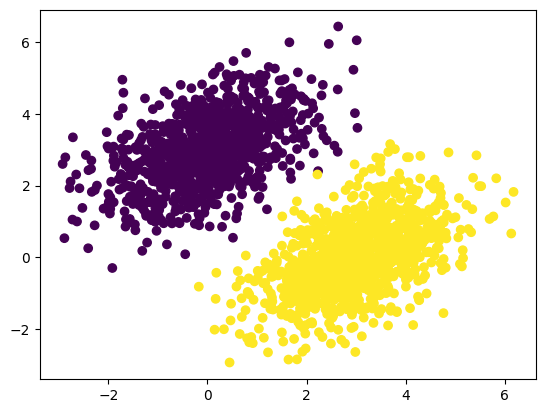

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(inputs[:,0], inputs[:,1], c=targets[:,0])
plt.show()

In [ ]:
input_dim = 2
output_dim = 1
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))

In [ ]:
def model(inputs):
    return tf.matmul(inputs, W) #+ b

In [ ]:
def square_loss(targets, predictions):
    per_sample_losses = tf.square(targets - predictions)
    return tf.reduce_mean(per_sample_losses)

In [ ]:
learning_rate = 0.1

def training_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss = square_loss(targets, predictions)
    #grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])
    grad_loss_wrt_W = tape.gradient(loss, W)
    W.assign_sub(grad_loss_wrt_W * learning_rate) #W.assign_sub(substract)
    #b.assign_sub(grad_loss_wrt_b * learning_rate)
    return loss

In [ ]:
for step in range(20):
    loss = training_step(inputs, targets)
    print(f"Loss at step {step}: {loss:.4f}")

Loss at step 0: 5.0589
Loss at step 1: 0.2039
Loss at step 2: 0.0927
Loss at step 3: 0.0887
Loss at step 4: 0.0886
Loss at step 5: 0.0886
Loss at step 6: 0.0886
Loss at step 7: 0.0886
Loss at step 8: 0.0886
Loss at step 9: 0.0886
Loss at step 10: 0.0886
Loss at step 11: 0.0886
Loss at step 12: 0.0886
Loss at step 13: 0.0886
Loss at step 14: 0.0886
Loss at step 15: 0.0886
Loss at step 16: 0.0886
Loss at step 17: 0.0886
Loss at step 18: 0.0886
Loss at step 19: 0.0886


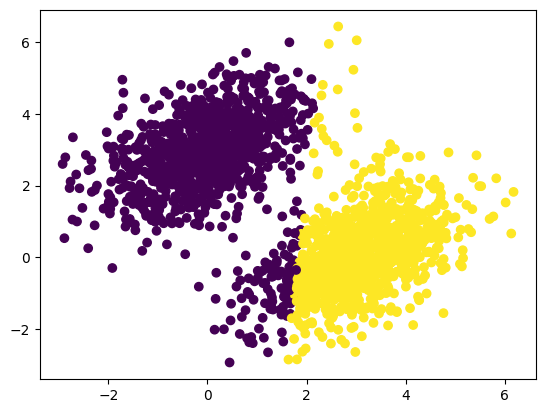

In [ ]:
predictions = model(inputs)
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
plt.show()

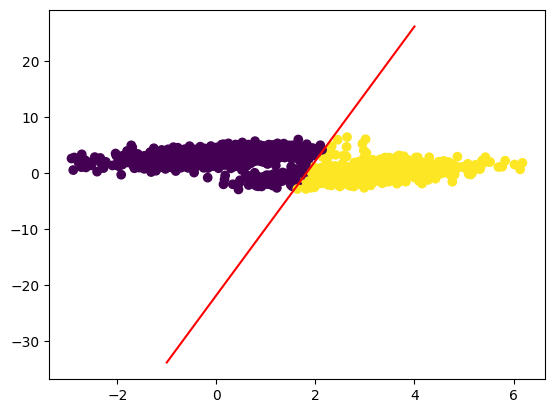

In [ ]:
x = np.linspace(-1, 4, 100)
y = - W[0] /  W[1] * x + (0.5 - b) / W[1]
plt.plot(x, y, "-r")
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)

In [ ]:
for step in range(20):
    loss = training_step(inputs, targets)
    print(f"Loss at step {step}: {loss:.4f}")

Loss at step 0: 0.0886
Loss at step 1: 0.0886
Loss at step 2: 0.0886
Loss at step 3: 0.0886
Loss at step 4: 0.0886
Loss at step 5: 0.0886
Loss at step 6: 0.0886
Loss at step 7: 0.0886
Loss at step 8: 0.0886
Loss at step 9: 0.0886
Loss at step 10: 0.0886
Loss at step 11: 0.0886
Loss at step 12: 0.0886
Loss at step 13: 0.0886
Loss at step 14: 0.0886
Loss at step 15: 0.0886
Loss at step 16: 0.0886
Loss at step 17: 0.0886
Loss at step 18: 0.0886
Loss at step 19: 0.0886


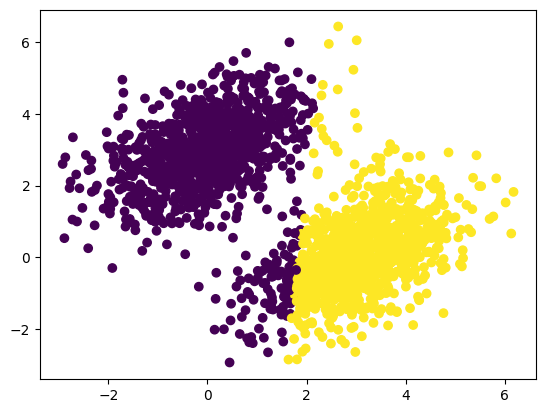

In [ ]:
predictions = model(inputs)
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
plt.show()

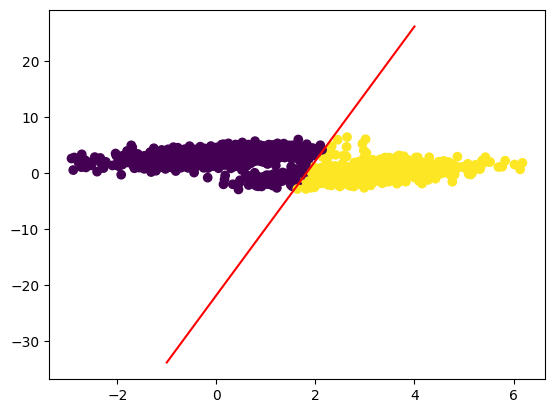

In [ ]:
x = np.linspace(-1, 4, 100)
y = - W[0] /  W[1] * x + (0.5 - b) / W[1]
plt.plot(x, y, "-r")
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)

# Understanding core Keras APIs

## Layers: building blocks of DL

In [ ]:
from tensorflow import keras

class SimpleDense(keras.layers.Layer):
    def __init__(self, units, activation = None):
        super().__init__()
        self.units = units
        self.activation = activation
    def build(self, input_shape):
        input_dim = input_shape[-1]
        self.W = self.add_weight(shape = (input_dim, self.units),
                                 initializer = 'random_normal')
        self.b = self.add_weight(shape = (self.units,),
                                 initializer = 'zeros')
    def call(self, inputs):
        y = tf.matmul(inputs, self.W) + self.b
        if self.activation is not None:
            y = self.activation(y)
        return y

In [ ]:
my_dense = SimpleDense(units = 32, activation = tf.nn.relu)
input_tensor = tf.ones(shape = (2,784))
output_tensor = my_dense(input_tensor)
print(output_tensor.shape)

(2, 32)


## builing layers

In [65]:
from tensorflow.keras import layers
layer = layers.Dense(32, activation = 'relu')

In [66]:
from tensorflow.keras import models
from tensorflow.keras import layers
model = models.Sequential([
    layers.Dense(32, activation = 'relu'),
    layers.Dense(32)
])

In [69]:
model = keras.Sequential([
    SimpleDense(32, activation = 'relu'),
    SimpleDense(10, activation = 'softmax')
])

## compile step

In [70]:
model = keras.Sequential([keras.layers.Dense(1)])
model.compile(optimizer = 'rmsprop',
              loss = 'mean_squared_error',
              metrics = ['accuracy'])

In [73]:
model.compile(optimizer = keras.optimizers.RMSprop(),
              loss = keras.losses.MeanSquaredError(),
              metrics = [keras.metrics.BinaryAccuracy()])

## Picking a loss function

In [75]:
history = model.fit(
    inputs,
    targets,
    epochs = 5,
    batch_size = 128
)

Epoch 1/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - binary_accuracy: 0.4236 - loss: 9.7798
Epoch 2/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - binary_accuracy: 0.4141 - loss: 9.3926  
Epoch 3/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - binary_accuracy: 0.4378 - loss: 9.1658 
Epoch 4/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - binary_accuracy: 0.4158 - loss: 8.4888 
Epoch 5/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - binary_accuracy: 0.4215 - loss: 8.3861 


In [76]:
history.history

{'binary_accuracy': [0.4325000047683716,
  0.43050000071525574,
  0.4259999990463257,
  0.42100000381469727,
  0.4165000021457672],
 'loss': [9.634997367858887,
  9.193777084350586,
  8.825207710266113,
  8.471698760986328,
  8.129108428955078]}

### monitor loss and metrics on validation data

In [78]:
model = keras.Sequential([keras.layers.Dense(1)])
model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=0.1),
              loss=keras.losses.MeanSquaredError(),
              metrics=[keras.metrics.BinaryAccuracy()])

indices_permutation = np.random.permutation(len(inputs))
shuffled_inputs = inputs[indices_permutation]
shuffled_targets = targets[indices_permutation]

num_validation_samples = int(0.3 * len(inputs))
val_inputs = shuffled_inputs[:num_validation_samples]
val_targets = shuffled_targets[:num_validation_samples]
training_inputs = shuffled_inputs[num_validation_samples:]
training_targets = shuffled_targets[num_validation_samples:]
model.fit(
    training_inputs,
    training_targets,
    epochs=5,
    batch_size=20,
    validation_data=(val_inputs, val_targets)
)

Epoch 1/5
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - binary_accuracy: 0.9320 - loss: 1.0418 - val_binary_accuracy: 1.0000 - val_loss: 0.0268
Epoch 2/5
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - binary_accuracy: 0.9517 - loss: 0.0748 - val_binary_accuracy: 0.9967 - val_loss: 0.0363
Epoch 3/5
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - binary_accuracy: 0.9591 - loss: 0.0710 - val_binary_accuracy: 0.9883 - val_loss: 0.0363
Epoch 4/5
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - binary_accuracy: 0.9718 - loss: 0.0596 - val_binary_accuracy: 0.8833 - val_loss: 0.1043
Epoch 5/5
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - binary_accuracy: 0.9492 - loss: 0.0758 - val_binary_accuracy: 0.9500 - val_loss: 0.0691


### using a model after training

In [79]:
predictions = model.predict(val_inputs, batch_size = 128)
print(predictions[:10])

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
[[ 0.157731  ]
 [-0.04405433]
 [ 0.78219604]
 [ 0.12191465]
 [ 0.6712116 ]
 [-0.19895321]
 [ 0.82359374]
 [ 0.07684848]
 [ 0.5298629 ]
 [ 0.77999735]]
